# **Import Libary dan Ekspor Dataset**

In [35]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv("/content/uberdataset_bersih.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DISTANCE_CATEGORY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,"5,1",Meal/Entertain,6,Medium
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5,Meeting,12,Medium
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,"4,8",Errand/Supplies,13,Short
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,"4,7",Meeting,14,Short
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,"21,65",Customer Visit,"54,375",Long
...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,"0,7",Meeting,7,Short
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,"3,9",Temporary Site,18,Short
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,"16,2",Meeting,35,Medium
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,"6,4",Temporary Site,18,Medium


## inconsistent values

Disini alasan saya mengubah type data, menganti koma pada kolom miles dan trip duration dan mengkonversi datetime sebagai berikut:

1. Data dalam bentuk string tidak relevan untuk analisis dan visualisasi, kalau tetap dijalankan terjadi error dan kebingungan untuk kesimpulannya,
2. Mengubah koma menjadi titik itu agar memastikan data dapat dibaca dan bisa di visualisasi dnegan semestinya dan tidak menyebabkan terjadinya error,
3. Jika data tetap dalam bentuk string, perhitungan seperti mean, total dan perbandingan maka terjadinya error, oleh karena itu mengubahnya menjadi float supaya semua perhitungan menjadi lebih mudah dan efisien,
4. Memastikan kolom start date maupun date time dikonversikan menjadi datetime, agar bisa divisualisasikan tanpa ada error ataupun kebingungan untuk kesimpulannya.

In [37]:
# Ganti koma dengan titik pada kolom 'MILES'
df['MILES'] = df['MILES'].str.replace(',', '.')

# Ubah kolom 'MILES' menjadi float
df['MILES'] = df['MILES'].astype(float)

# Ganti koma dengan titik pada kolom 'MILES'
df['TRIP_DURATION'] = df['TRIP_DURATION'].str.replace(',', '.')

# Ubah kolom 'MILES' menjadi float
df['TRIP_DURATION'] = df['TRIP_DURATION'].astype(float)

# Memastikan dikonversi menjadi datetime
df["START_DATE"] = pd.to_datetime(df["START_DATE"])

df["END_DATE"] = pd.to_datetime(df["END_DATE"])

In [38]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TRIP_DURATION,DISTANCE_CATEGORY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.10,Meal/Entertain,6.000,Medium
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.00,Meeting,12.000,Medium
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.80,Errand/Supplies,13.000,Short
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.70,Meeting,14.000,Short
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,21.65,Customer Visit,54.375,Long
...,...,...,...,...,...,...,...,...,...
1149,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.70,Meeting,7.000,Short
1150,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.90,Temporary Site,18.000,Short
1151,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.20,Meeting,35.000,Medium
1152,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.40,Temporary Site,18.000,Medium


# **Visualisasi, Insight dan Tindakan Dataset**

## Bar Chart

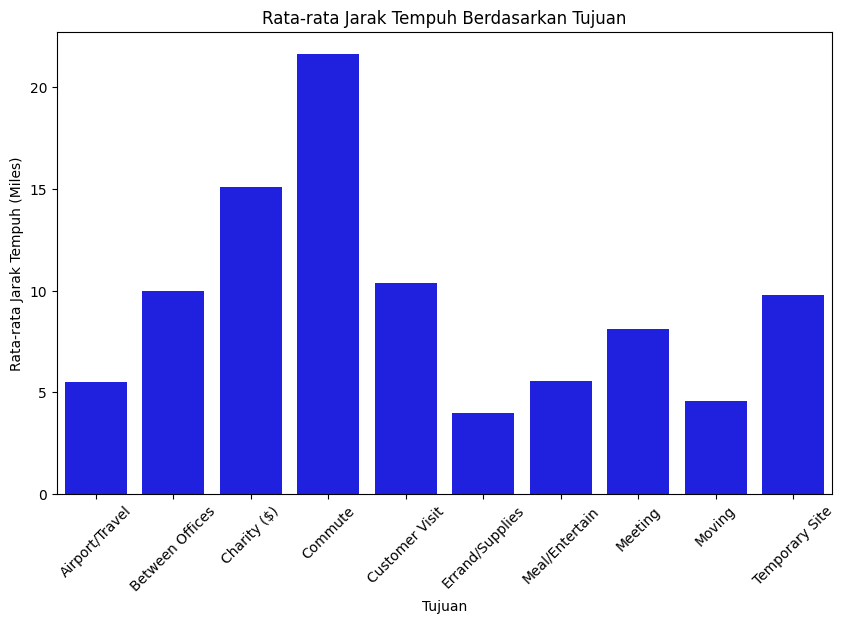

In [ ]:
# Bar Chart (Seaborn) : Rata-rata jarak tempuh

Jarak_berdasarkan_tujuan = df.groupby('PURPOSE')['MILES'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=Jarak_berdasarkan_tujuan.index, y=Jarak_berdasarkan_tujuan.values, color='blue')
plt.title('Rata-rata Jarak Tempuh Berdasarkan Tujuan')
plt.xlabel('Tujuan')
plt.ylabel('Rata-rata Jarak Tempuh (Miles)')
plt.xticks(rotation=45)
plt.show()

**Insight**

bar chart ini menunjukkan rata-rata jarak tempuh berdasarkan tujuan perjalanan. Sumbu x merepresentasikan tujuan perjalanan, sedangkan sumbu y menunjukkan rata-rata jarak tempuh dalam mil.

Dapat disimpulkan bahwa perjalanan dengan tujuan Commute memiliki rata-rata jarak tempuh tertinggi dibandingkan tujuan perjalanan lainnya, yang menunjukkan bahwa perjalanan ke tempat kerja umumnya melibatkan jarak yang jauh. Sementara itu, beberapa tujuan perjalanan lain seperti Errand/Supplies dan Moving memiliki rata-rata jarak tempuh yang lebih rendah, yang dapat menunjukan bahwa perjalanan tersebut lebih sering dilakukan dalam jarak dekat.

**Tindakan**

1. Menawarkan paket member, diskon atau promo bagi pelanggan yang sering menggunakan perjalanan jarak jauh maupun jarak dekat untuk meningkatkan loyalitas pelanggan dan konsisten menggunaan layanan uber.
2. Mencari dan Mengembangkan strategi harga yang lebih kompetitif untuk perjalanan jarak pendek agar tetap menarik bagi pelanggan.
3. Menyediakan fitur rute alternatif bagi perjalanan jarak jauh dan jarak pendek.

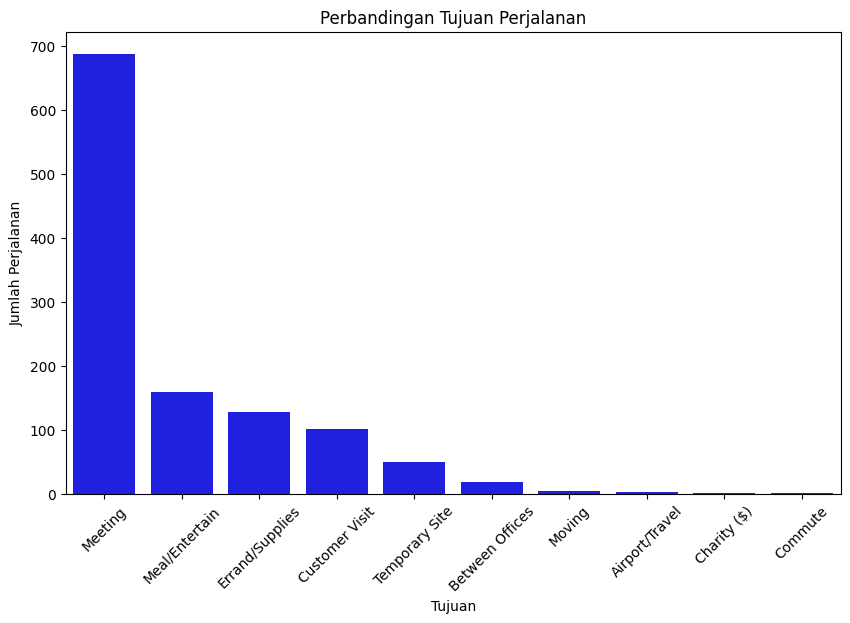

In [ ]:
#Bar Chart (Seaborn) : Perbandingan Tujuan Perjalanan
purpose = df["PURPOSE"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=purpose.index, y=purpose.values, color='blue')
plt.title('Perbandingan Tujuan Perjalanan')
plt.xlabel('Tujuan')
plt.ylabel('Jumlah Perjalanan')
plt.xticks(rotation=45)
plt.show()

**Insight**

Histogram ini menunjukkan perbandingan tujuan perjalanan dalam layanan Uber, dengan sumbu x mewakili jenis tujuan perjalanan dan sumbu y menunjukkan  jumlah perjalanan yang dilakukan.

Dapat disimpulkan bahwa perjalanan dengan tujuan Meeting memiliki jumlah perjalanan tertinggi dibandingkan tujuan perjalanan lainnya, yang menunjukkan bahwa perjalanan untuk keperluan bisnis merupakan jenis perjalanan yang paling sering dilakukan dalam layanan Uber.

**Tindakan**

1. Meningkatkan pemasaran dan daya tarik untuk perjalanan non bisnis seperti promo atau diskon perjalanan non bisnis.
2. Menawarkan dan meningkatkan layanan, terkhusus Business seperti fitur pemesananan yang lebih efisien dan fleksibel untuk pengguna perusahaan tertentu.


## Pie Chart

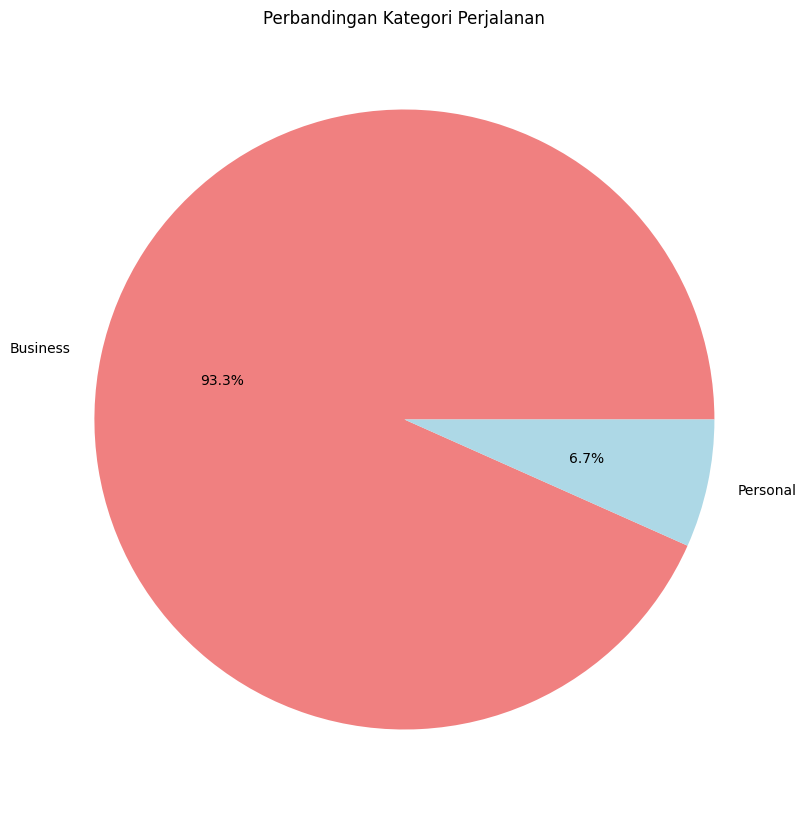

In [ ]:
# Pie Chart (Matplotlib): Perbandingan Kategori Perjalanan
plt.figure(figsize=(10, 15))
plt.pie(df['CATEGORY'].value_counts(), labels=df['CATEGORY'].value_counts().index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue', 'lightgreen', 'gold'])
plt.title('Perbandingan Kategori Perjalanan')
plt.show()

**Insight**

Pie chart ini menunjukkan perbandingan kategori perjalanan dalam layanan Uber, dengan dua kategori utama, yaitu Business dan Personal. Grafik ini menggambarkan proporsi masing-masing kategori terhadap total perjalanan yang dilakukan oleh pengguna uber.

Dapat disimpulkan bahwa kategori oerjalanan Bussiness memiliki presentase tertinggi yaitu 93,3% dibandingkan dengan personal, yang cuma presentase sebesar yaitu 6,7%, yang menunjukkan sebagian besar perjalanan dalam layanan Uber digunakan untuk keperluan bussiness.

**Tindakan**

1. Dapat memperkuat posisinya sebagai layanan transportasi utama untuk perjalanan bussiness dengan menyediakan fitur khusus untuk pengguna perusahaan seperti akun perusahaan.
2. Meningkatkan minat perjalanan pribadi, dengan cara memberikan promosi, diskon, loyalitas bagi pelanggan yang menggunakan layanan uber non-bussiness.
3. Mengidentifikasi pola perjalanan berulang-ulang untuk mengoptimalkan rute dan mengurangi biaya transportasi.

## Line Chart

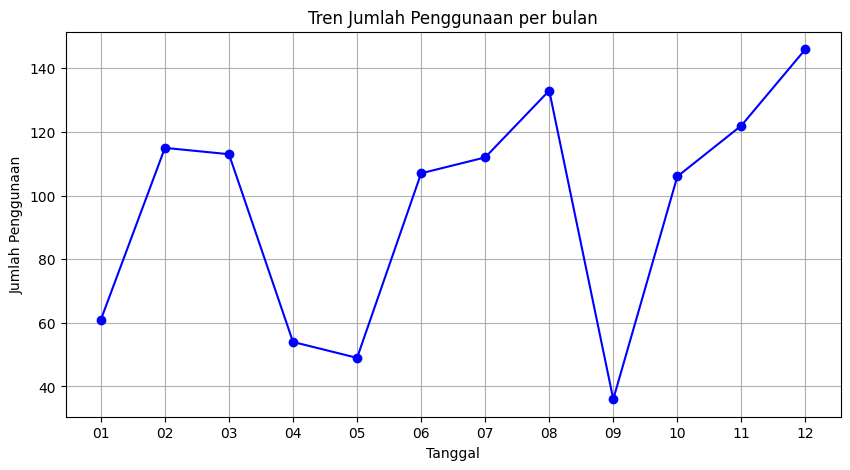

In [39]:
# Line Chart (Matplotlib): Tren Jumlah Penggunaan per bulan
df_visits_per_month = df.groupby(df['START_DATE'].dt.strftime('%m')).size()
plt.figure(figsize=(10, 5))
plt.plot(df_visits_per_month.index, df_visits_per_month.values, marker='o', color='blue')
plt.title('Tren Jumlah Penggunaan per bulan')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan')
plt.grid()
plt.show()

**Insight**

Line chart ini menunjukkan tren jumlah perjalanan per bulan yang dilakukan oleh pengguna layanan Uber, dengan sumbu x mewakili bulan dalam setahun dan sumbu y menunjukkan jumlah perjalanan yang dilakukan pada bulan tersebut. Grafik ini mengilustrasikan perubahan jumlah perjalanan sepanjang tahun, dengan titik-titik data yang terhubung oleh garis untuk menunjukkan pola perubahan dari bulan ke bulan.

Dapat disimpulkan bahwa jumlah perjalanan perbulan mengalami perubahan naik turun atau ketidakstabilan jumlah perjalanan perbulan dalam setahun, dengan puncak perjalanan tertinggi pada bulan desember yang memiliki jumlah perjalanan tertinggi dibandingkan dengan bulan september yang memiliki jumlah perjalanan paling sedikit, hal ini menunjukan penggunaan layanan uber ini disebabkan beberapa faktor sepeti hari-hari besar, waktu liburan dan lain sebagainya yang meningkatkan jumlah perjalanan.

**Tindakan**

1. Dapat menganalisis lebih lanjut mengenai faktor-faktor mempengaruhi lonjakan permintaan layanan uber pada bulan tertentu, seperti hari-hari besar, waktu liburan dan lain sebagainya.
2. Menyediakan dan meningkatkan layanan serta jumlah transportasi yang beroperasi pada bulan-bulan yang memiliki permintaan tinggi untuk menghindari kenaikan permintaan sangat tinggi selain itu juga mencegah keterlambatan/macet dan menjga kepuasaan dan kenyamanan pelanggan.

## Histogram

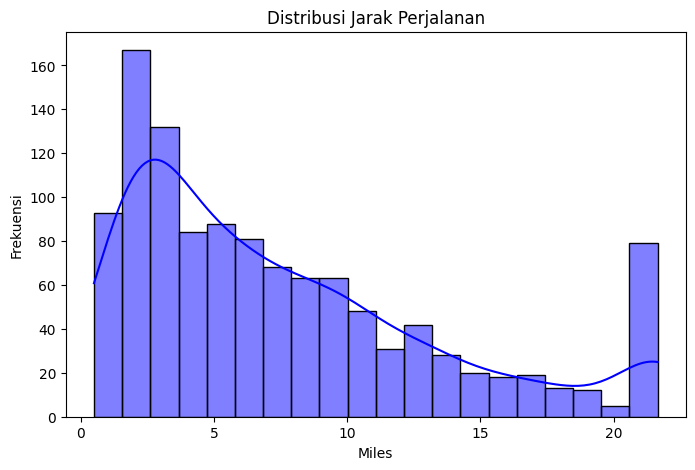

In [ ]:
# Histogram (Seaborn): Disribusi Jarak Perjalanan
plt.figure(figsize=(8, 5))
sns.histplot(df['MILES'], bins=20, kde=True, color='blue')
plt.title('Distribusi Jarak Perjalanan')
plt.xlabel('Miles')
plt.ylabel('Frekuensi')
plt.show()

**Insight**

Histogram ini menunjukkan distribusi jarak perjalanan yang dilakukan oleh pengguna layanan Uber, dengan sumbu x mewakili jarak tempuh dalam miles dan sumbu y menunjukkan frekuensi kemunculan perjalanan dengan jarak tertentu. Grafik ini menggunakan 20 bins untuk mengelompokkan data dan dilengkapi dengan garis Kernel Density Estimate (KDE) yang menggambarkan pola distribusi secara lebih halus.

Dari grafik, terlihat bahwa sebagian besar perjalanan berada dalam rentang 0 hingga 10 miles, menunjukkan bahwa layanan Uber lebih sering digunakan untuk perjalanan jarak pendek dalam kota. Distribusi data memiliki ekor panjang ke kanan, yang berarti ada beberapa perjalanan dengan jarak jauh (lebih dari 20 miles), tetapi jumlahnya jauh lebih sedikit dibandingkan perjalanan pendek.

Selain itu, terdapat puncak distribusi di sekitar 5 miles, yang menunjukan bahwa uber sering digunakan untuk perjalanan singkat.

**Tindakan**

1. Menawarkan diskon atau promo pengguna untuk perjalanan jarak jauh dan jarak dekat untuk meningkatkan jumlah perjalanan terutama perjalanan jarak jauh  yang jumlahnya lebih sedikit.
2. Mengoptimalkan tarif untuk memastikan harga tetap kompetitif.
3. Menyediakan fitur rute tercepat berdasarkan data-data lampu lalu lintas untuk meningkatkan efisiensi perjalanan jarak jauh maupun jarak dekat.

## Scatter Plot

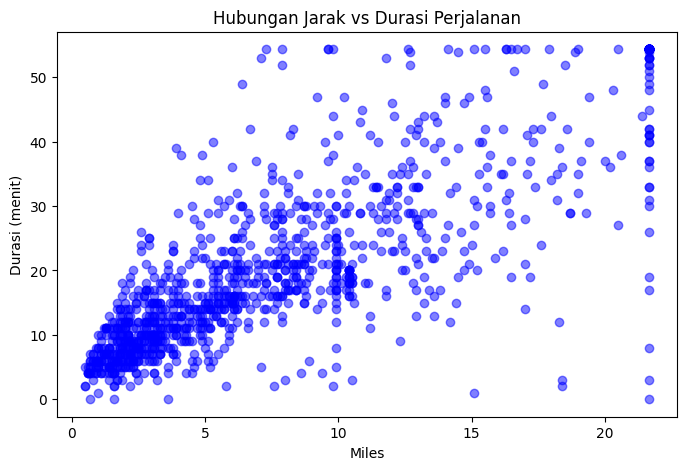

In [ ]:
# Scatter Plot (Matplotlib): Jarak Vs Durasi Perjalanan
plt.figure(figsize=(8, 5))
plt.scatter(df['MILES'], df['TRIP_DURATION'], c='blue', alpha=0.5)
plt.title('Hubungan Jarak vs Durasi Perjalanan')
plt.xlabel('Miles')
plt.ylabel('Durasi (menit)')
plt.show()

**Insight**

Scatter plot ini menunjukkan hubungan antara jarak (miles) dengan durasi perjalanan. Dari pola titik-titik yang terlihat, terdapat korelasi positif antara jarak dan durasi perjalanan, dimana perjalanan yang lebih jauh cenderung meiliki durasi yang lebih lama, sedangkan perjalanan dekat umumnya memiliki durasi yang lebih singkat. Namun ada beberapa kasus perjalanan dekat dengan durasi yang lama yang menyebabkan korelasi nya tidak kuat atau sempurna.

Hal ini dapat disebabkan oleh berbagai faktor, seperti kemacetan, kondisi jalan yang buruk, atau faktor lainnya. Dari pola yang dihasilkan scatter plot, dapat disimpulkan bahwa layanan uber lebih sering digunakan untuk perjalanan jarak dekat, meskipun ada sejumlah perjalanan jarak jauh.

**Tindakan**

1. Dapat menganalisis lebih lanjut mengenai faktor-faktor terhadap kasus perjalanan dekat dengan durasi lama, seperti kemacetan, kondisi jalan yang buruk, atau faktor lainnya.
2. Menyediakan rekomendasi rute alternatif kepada pengemudi dan menyediakan rekomendasi waktu perjalanan terbaik kepada pengguna agar mengurangi faktor yang terjadi.